[View in Colaboratory](https://colab.research.google.com/github/namannice/namanpython/blob/master/cifar10_keras_new.ipynb)

In [1]:
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Activation,Dense, Dropout, Flatten, Conv2D, MaxPooling2D
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
import numpy as np
from sklearn.model_selection import train_test_split 
from keras import optimizers
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
batch_size = 10
num_classes = 10
epochs = 20
img_width,img_height = 32,32

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

170500096/170498071 [==============================] - 113s 1us/step


In [4]:
print('Shape of X is {} and Y is {}'.format(x_train.shape, y_train.shape))

Shape of X is (50000, 32, 32, 3) and Y is (50000, 10)


In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [0]:
x_train1,x_val,y_train1,y_val = train_test_split (x_train,y_train,test_size=0.2,random_state=1)

In [7]:
print(x_train1.shape)
print(y_train1.shape)
print(x_val.shape)
print(x_val.shape)

(40000, 32, 32, 3)
(40000, 10)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [0]:
model = Sequential()

model.add(Conv2D(64, padding='same', kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(64, padding='same', kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, padding='same', kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, padding='same', kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(256, padding='same', kernel_size=(5, 5), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, padding='same', kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))



model.add(Flatten())


model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        4864      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       73856     
__________

In [0]:
rmsprop_new = optimizers.Adam(lr=7e-4)

In [0]:
model.compile(loss='categorical_crossentropy', optimizer = rmsprop_new, metrics=['accuracy'])

In [0]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(x_train)

train_gen = datagen.flow(x_train1, y_train1, 
                        batch_size=100)

validation_gen = (x_val, y_val) 
                        

trained_model = model.fit_generator(train_gen, steps_per_epoch = 400, epochs = 50, validation_data  = validation_gen)


In [13]:
score = model.evaluate(x_test, y_test)
print('Testing Accuracy: ',score[1]*100)

10000/10000 [==============================] - 5s 498us/step
Testing Accuracy:  85.55


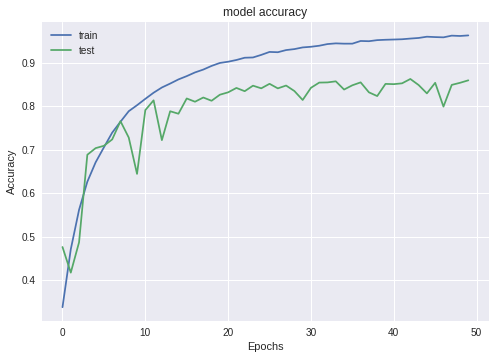

In [14]:
plt.plot(trained_model.history['acc'])
plt.plot(trained_model.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

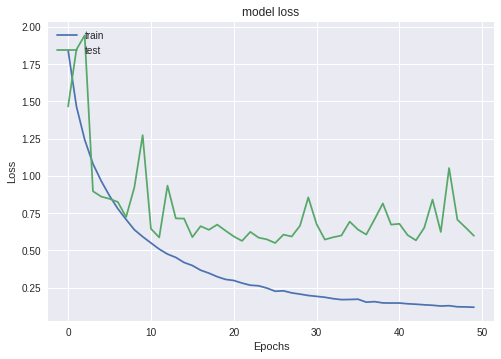

In [15]:
plt.plot(trained_model.history['loss'])
plt.plot(trained_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
model.save_weights(filepath='cifar10-cnn-new.hdf5')

In [0]:
model.load_weights(filepath='cifar10-cnn-new.hdf5')

Prediction: Dog


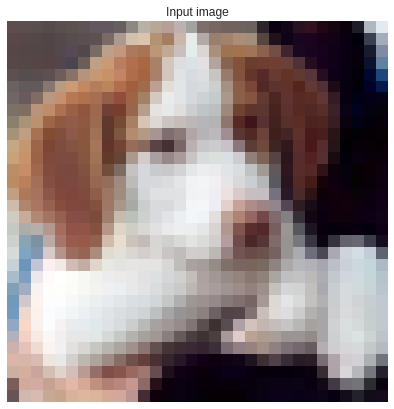

In [18]:
StringLabels = ["Airplane","Automobile","Bird","Cat","Deer","Dog","Frog","Horse","Ship","Truck"]
index = 16
Production_image = x_test[index].reshape(-1,32,32,3)
prediction = model.predict(Production_image)
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1,1,1,xticks=[],yticks=[])
ax.set_title("Input image")
ax.imshow(x_test[index])
print("Prediction: {}".format(StringLabels[np.argmax(prediction)]))

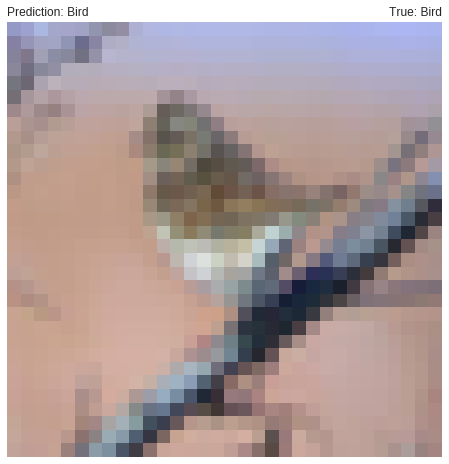

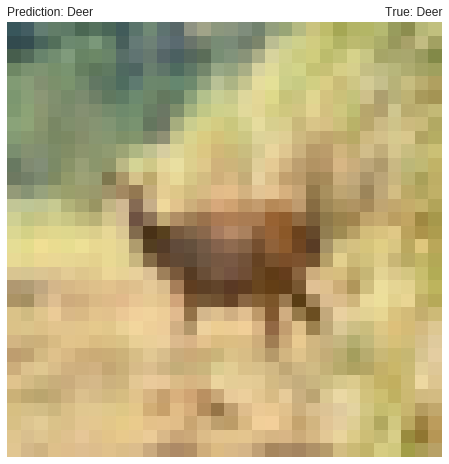

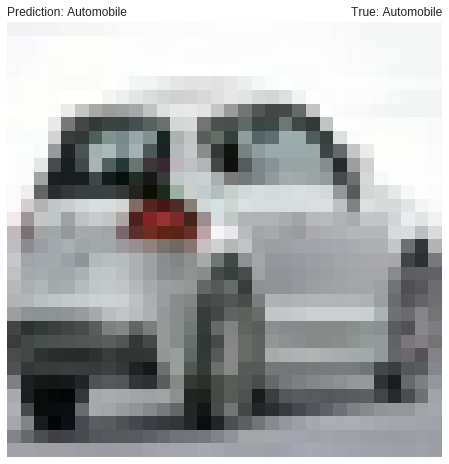

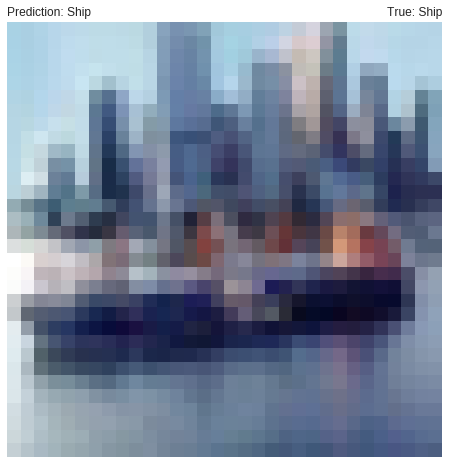

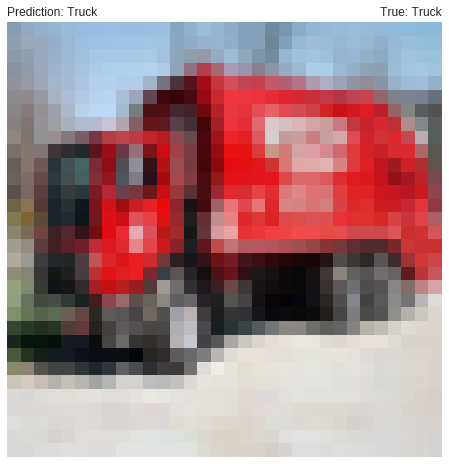

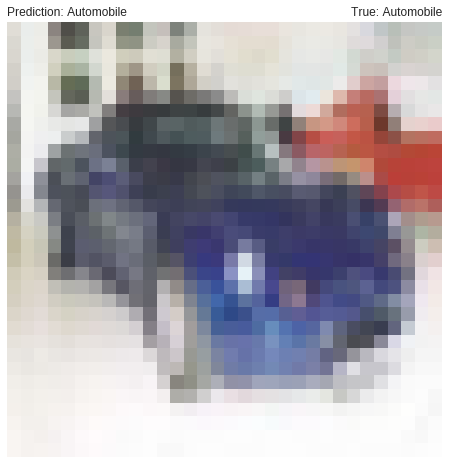

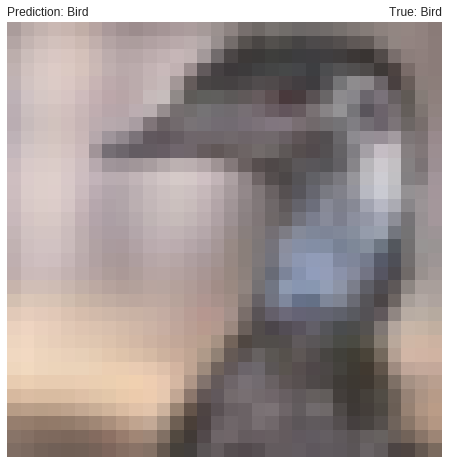

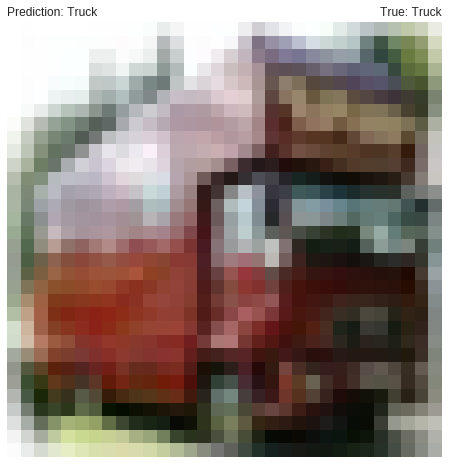

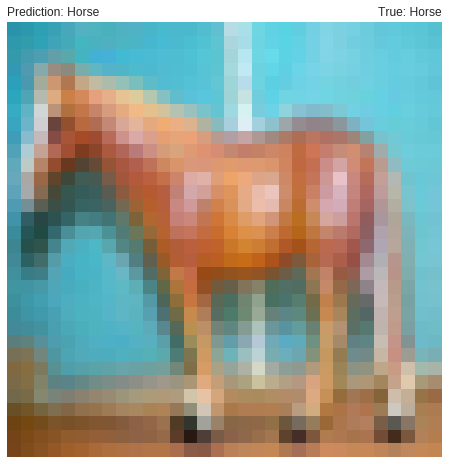

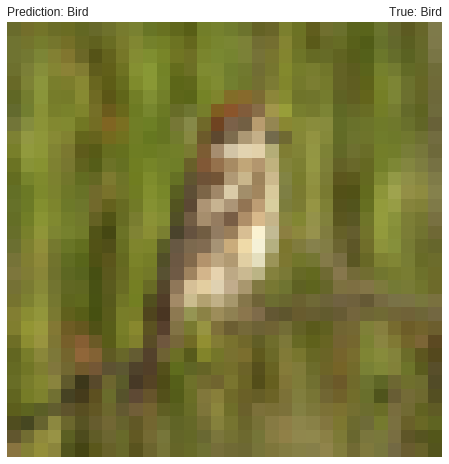

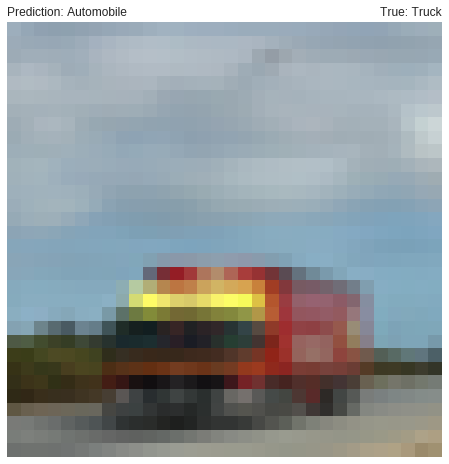

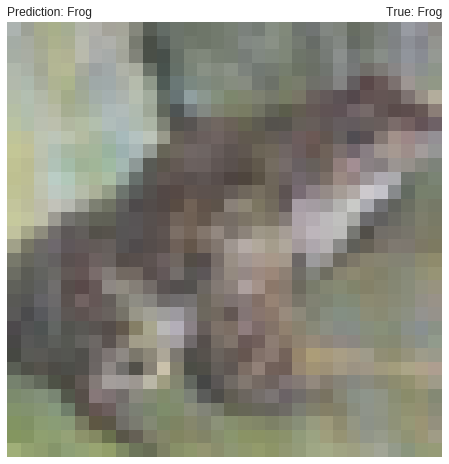

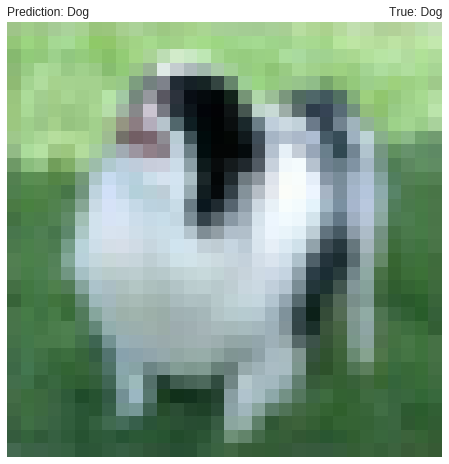

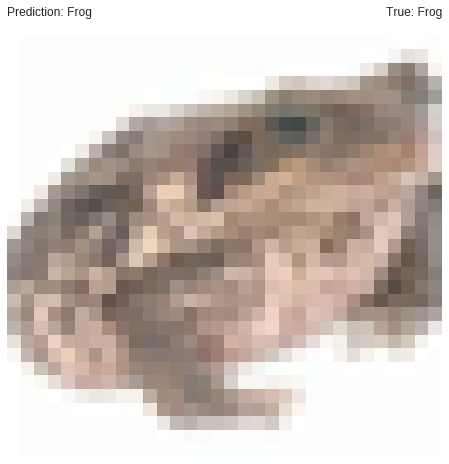

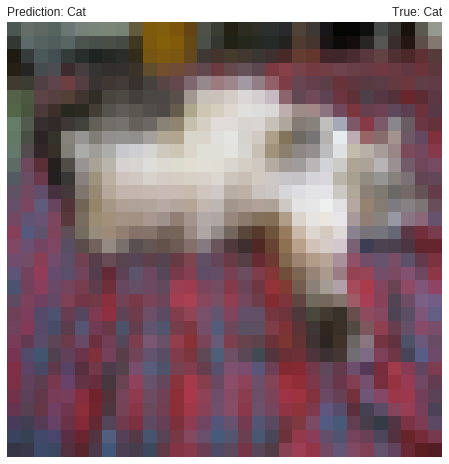

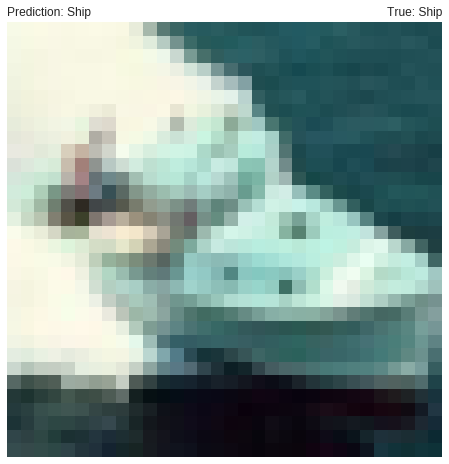

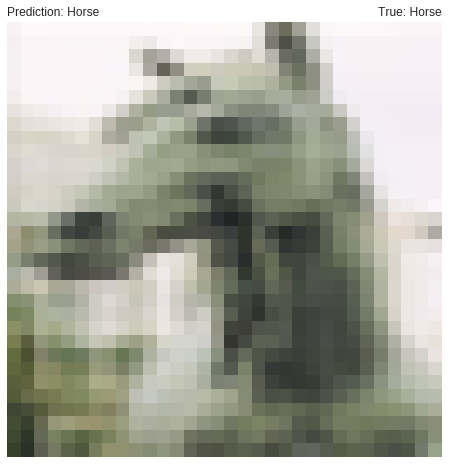

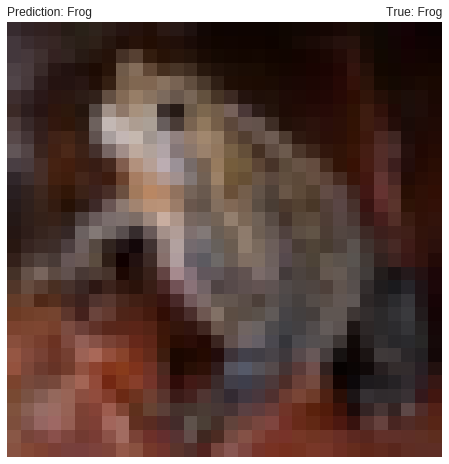

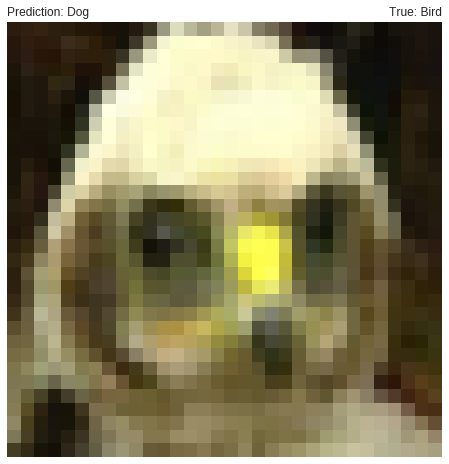

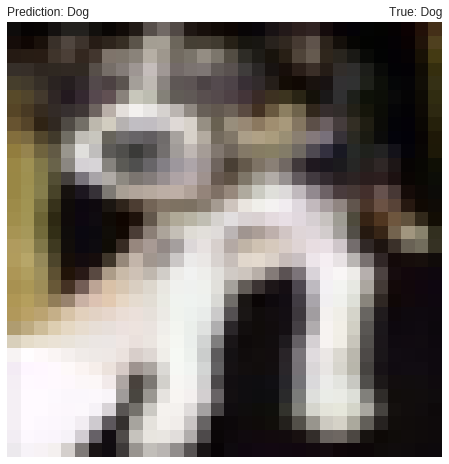

In [19]:
for index in range(129,149):
  
  Production_image = x_test[index].reshape(-1,32,32,3)
  
  prediction = model.predict(Production_image)
  
  fig = plt.figure(figsize=(8,8))
  
  
  ax = plt.subplot(1,1,1,xticks=[],yticks=[])
  plt.title("True: {}".format(StringLabels[np.argmax(y_test[index])]),loc='right')
  plt.title("Prediction: {}".format(StringLabels[np.argmax(prediction)]),loc='left')
  ax.imshow(x_test[index])